In [28]:
import sys
sys.path.append('../../src')

from create_plots_feature import MakeFeaturePlots

### Hypotheses 1: Electronics and Age \
Electronic: Have you ever used personal electronics during takeoff or landing in violation of a flight attendant's direction? \
Age: How old are you?

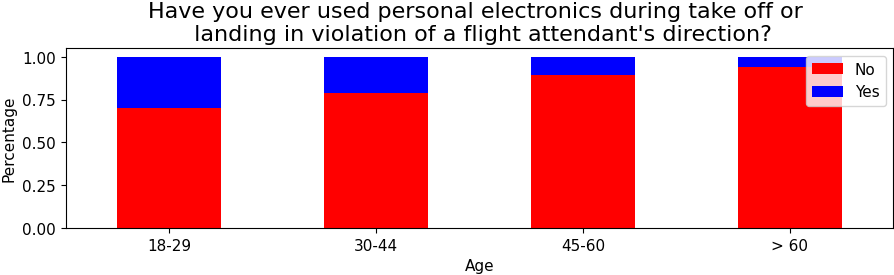

In [29]:
%%capture --no-display

import pandas as pd
from tueplots.constants.color import rgb
import matplotlib.pyplot as plt
from tueplots import bundles 
from features_trans_back import features_trans_back_shortened as ftbs
from features_trans_back import question_short as qs
import os

PATH_CODED_CSV = '../../data/coded.csv'

event = "Have you ever used personal electronics during take off or landing in violation of a flight attendant's direction?"
condition = 'Age'


df  = pd.read_csv(PATH_CODED_CSV)

 # set plotting stylesheet
plt.rcParams.update(bundles.icml2022(column='half', usetex=False))
plt.rcParams.update({
    'text.usetex': False,
    'font.family': 'serif',
    'text.latex.preamble': '\\usepackage{times} ',
    'figure.figsize': (3.25*2.77, 2.0086104634371584*1.4),
    'figure.constrained_layout.use': True,
    'figure.autolayout': False,
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.015,
    'font.size': 11+5,
    'axes.labelsize': 8+3,
    'legend.fontsize': 8+3,
    'xtick.labelsize': 8+3,
    'ytick.labelsize': 8+3,
    'axes.titlesize': 11+5
})
plotter = MakeFeaturePlots(df, condition)

conditional_prob = plotter.calculate_conditional_probability(df, condition, event)

conditional_prob.plot(kind='bar', stacked=True, color=['#ff0000', '#0000ff'])
# Use a specific color from tueplots.constants.color
title = qs(conditional_prob.columns.name)

plt.title("Have you ever used personal electronics during take off or \n landing in violation of a flight attendant's direction?")
plt.xlabel(conditional_prob.index.name)
plt.ylabel('Percentage')
feature_name = ftbs(conditional_prob.columns.name)
q_name = conditional_prob.index.name
q_name_list = conditional_prob.index.tolist()

answer_change = []
for i in q_name_list:
    i = float(i)
    answer_change.append(ftbs(q_name, i))

columns_list = []
for i in conditional_prob.columns.tolist():
    i = float(i)
    columns_list.append(ftbs(conditional_prob.columns.name, i))

plt.xticks(range(len(q_name_list)), answer_change, rotation=0)
plt.legend(columns_list, loc='upper right')

path_fig = '../../doc/AnalysisPassengerBehaviour/fig'
plt.savefig(os.path.join(path_fig, 'hypo_1.pdf'))
plt.show()
        